# Price Regression

In [1]:
from load import main
df = main()
df

,rating,alcohol,price,lat,lng,age,category_Dessert,category_Fortified,category_Port/Sherry,category_Red,...,reviewer_Kerin O’Keefe,reviewer_Lauren Buzzeo,reviewer_Matt Kettmann,reviewer_Michael Schachner,reviewer_Mike DeSimone,reviewer_Paul Gregutt,reviewer_Roger Voss,reviewer_Sean P. Sullivan,reviewer_Susan Kostrzewa,reviewer_Virginie Boone
6180,84,13.0,17,41.170042,-7.304750,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6201,93,0.0,50,41.170042,-7.304750,8,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6274,87,0.0,0,41.170042,-7.304750,15,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6306,92,13.0,45,41.170042,-7.304750,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6317,89,13.5,18,41.170042,-7.304750,14,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320252,86,14.5,20,-35.113970,-71.279980,17,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
320253,82,13.0,18,-35.113970,-71.279980,18,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
320254,83,14.0,13,-35.113970,-71.279980,16,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
320665,91,14.0,25,-34.999037,-71.381712,9,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

# Folds
from sklearn.model_selection import KFold

# Scoring
from sklearn.metrics import mean_absolute_error

# Models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Data X, y split
X = df.drop("price", axis=1).values
y = df["price"].to_numpy()

In [4]:
# Scoring Functions
scoring_mape = lambda y, ypred: mean_absolute_error(y, ypred)

In [5]:
# Parameters
my_model = lambda: LinearRegression()
my_score = scoring_mape

Score: 12.614879622096511


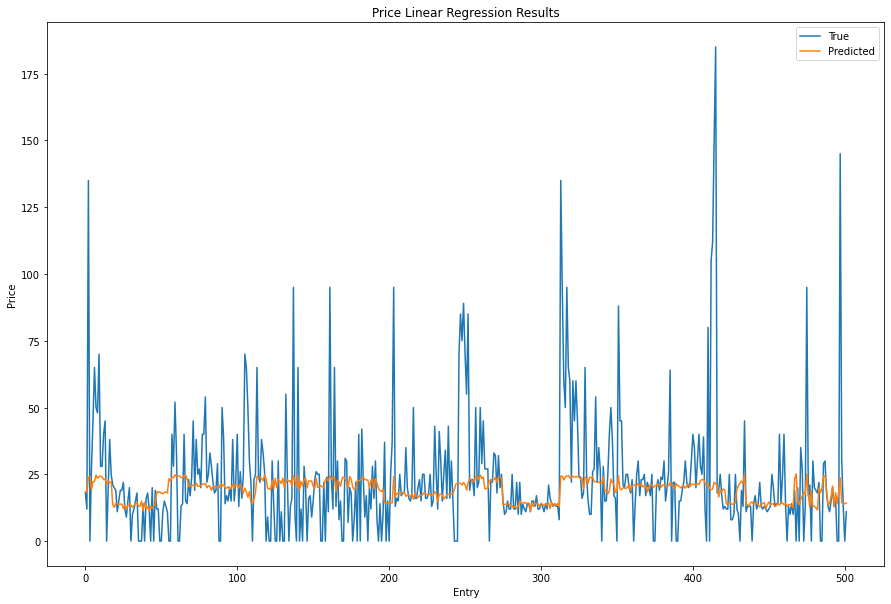

Score: 12.3963589187147


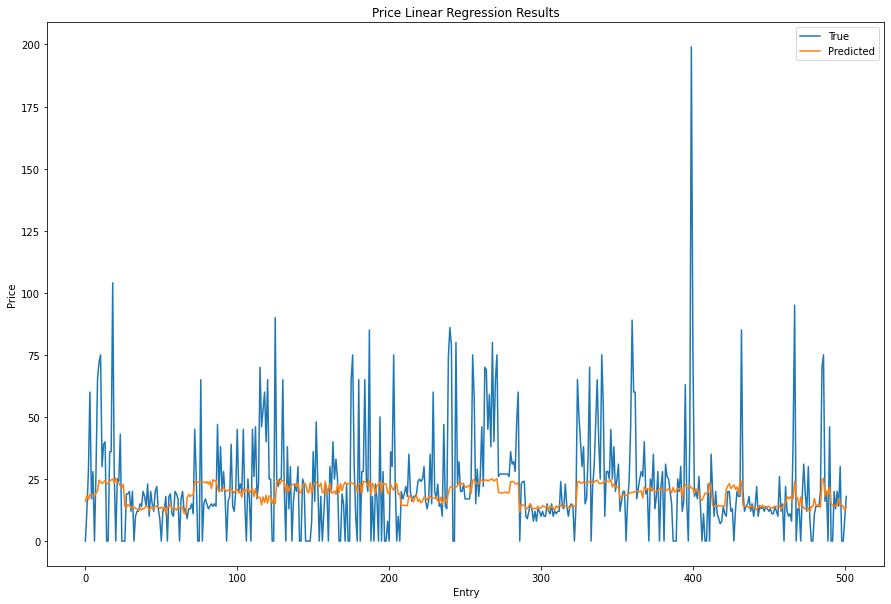

Score: 13.504396256825896


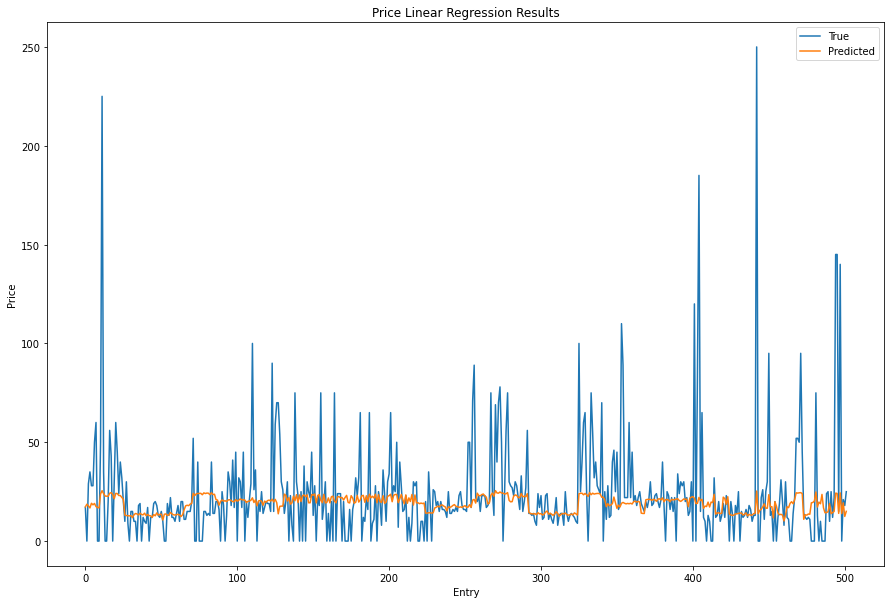

Score: 11.893029193811154


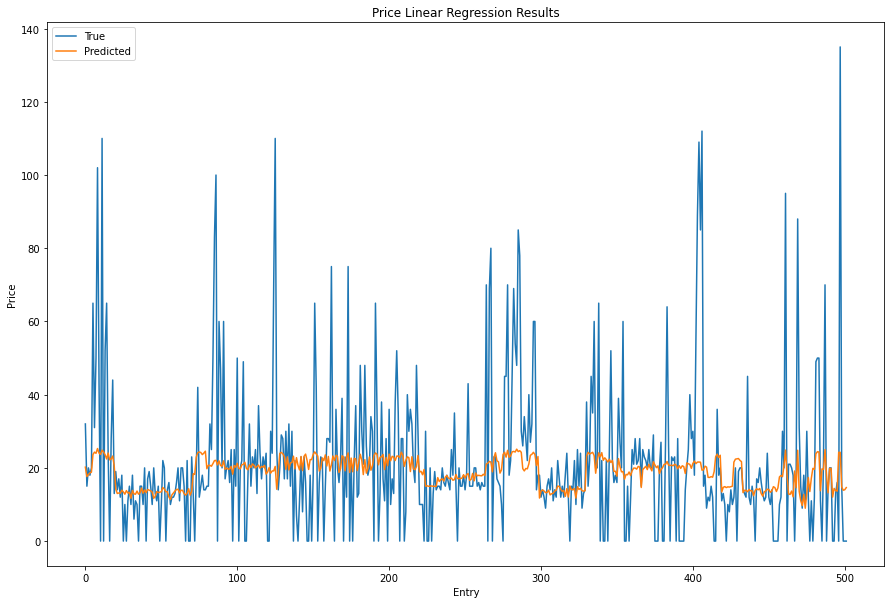

Score: 12.988861514634053


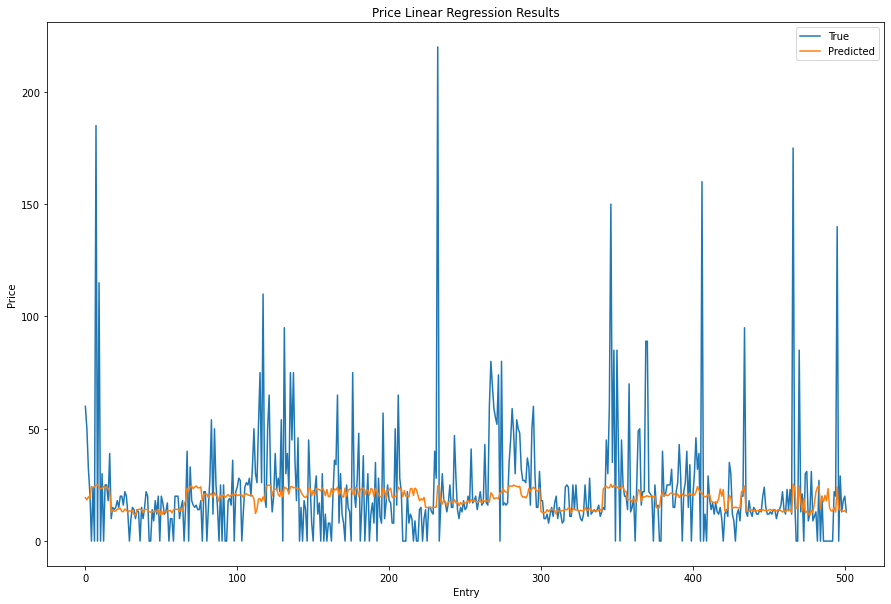

Score: 11.447257343832623


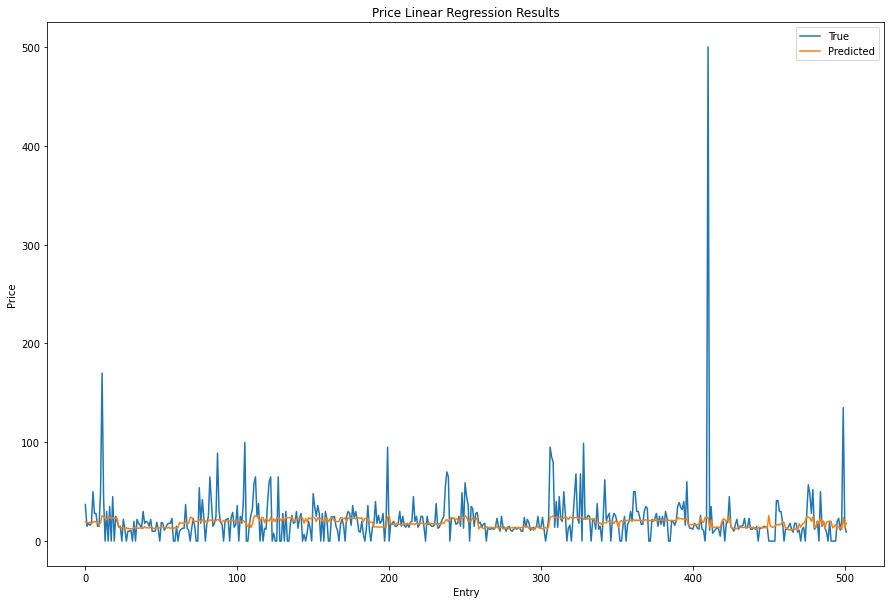

Score: 11.791252077637003


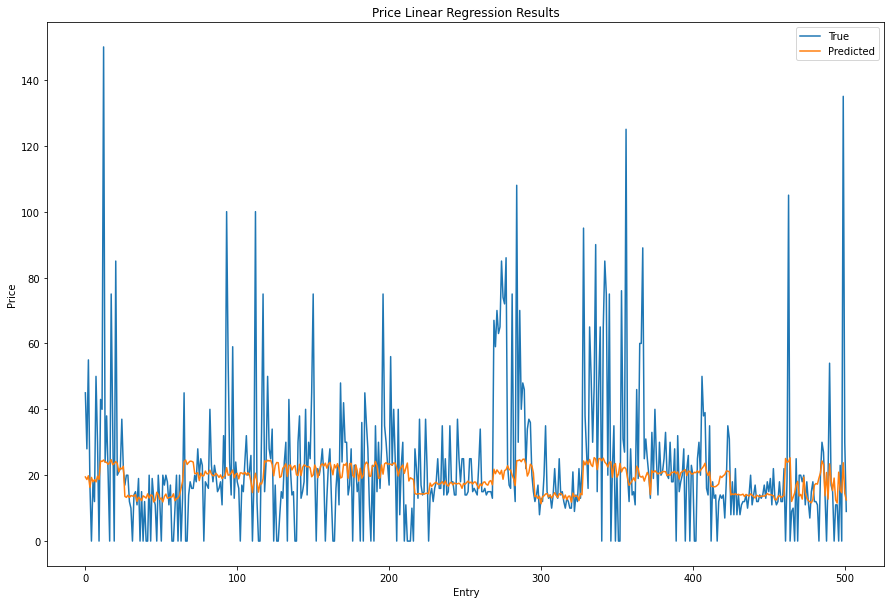

Score: 13.64544713818748


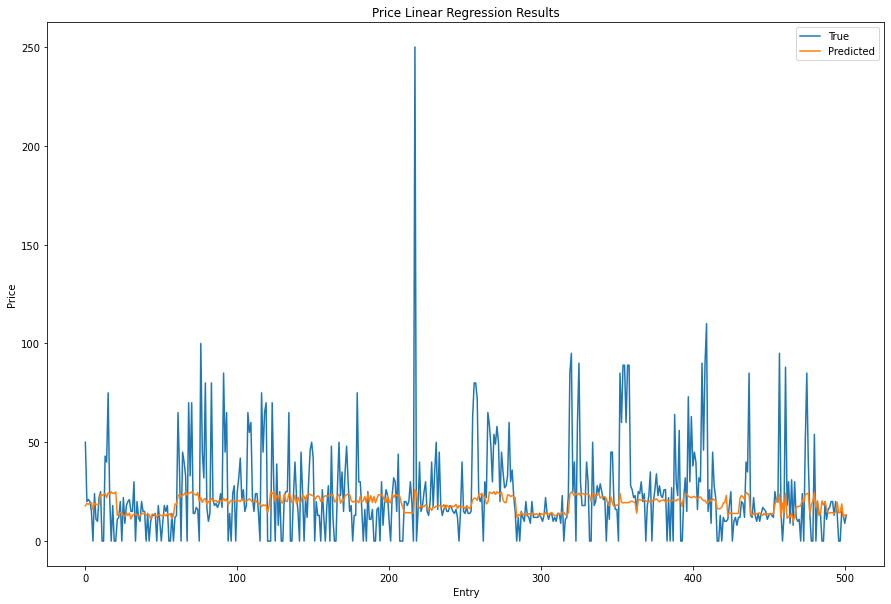

Score: 12.63412039996314


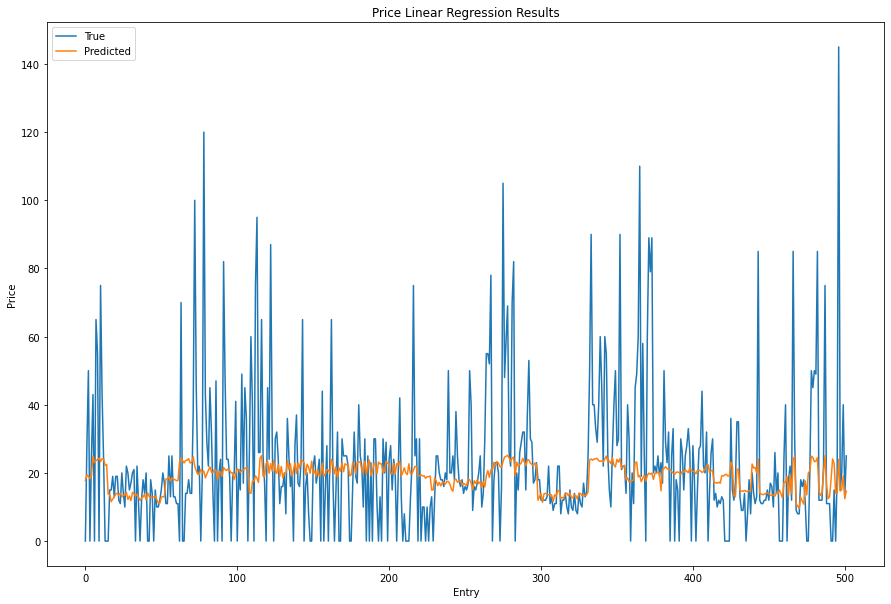

Score: 12.73829603222476


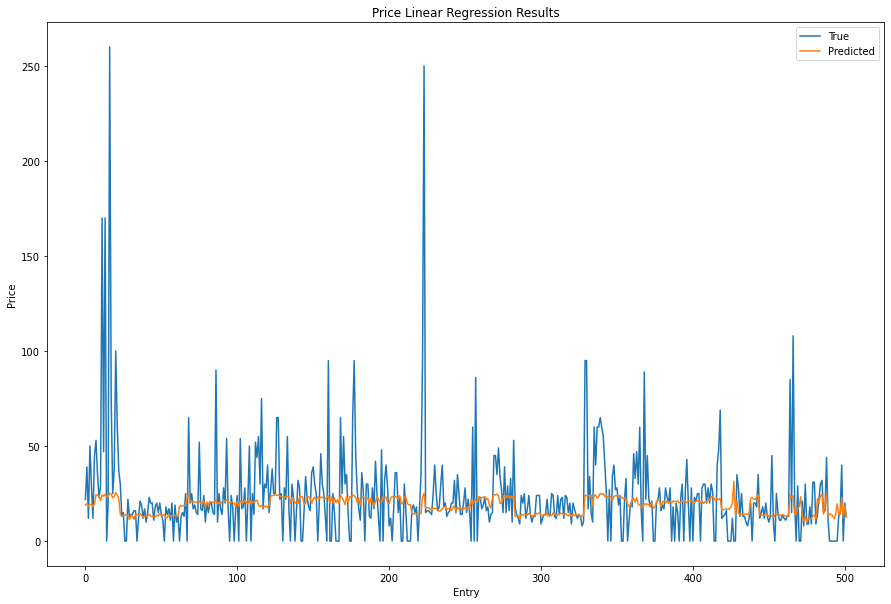

[12.614879622096511, 12.3963589187147, 13.504396256825896, 11.893029193811154, 12.988861514634053, 11.447257343832623, 11.791252077637003, 13.64544713818748, 12.63412039996314, 12.73829603222476]
Mean: 12.565389849792732
Std: 0.7145165111330726


In [6]:
scores = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
for train_idxs, test_idxs in kfold.split(X):
    # Train test split from kfold
    X_train, y_train = X[train_idxs, :],  y[train_idxs]
    X_test, y_test = X[test_idxs, :], y[test_idxs]
    
    # Fit predict
    model = my_model()
    predicted = SVR().fit(X_train, y_train).predict(X_test)
    
    # Model Score
    scores.append(my_score(y_test, predicted))
    print(f"Score: {scores[-1]}")
    
    # Plotting
    plt.figure(figsize=(15,10))
    plt.plot(y_test, label="True")
    plt.plot(predicted, label= "Predicted")
    plt.xlabel("Entry")
    plt.ylabel("Price")
    plt.title("Price Linear Regression Results")
    plt.legend()
    plt.show()
print(scores)
print(f"Mean: {mean(scores)}")
print(f"Std: {stdev(scores)}")